Installation package

In [36]:
import numpy as np

In [1]:
# !pip install --user Cython
# !pip install --user contextlib2
# !pip install --user pillow
# !pip install --user lxml
# !pip install --user jupyter
# !pip install --user matplotlib

Installation protobuff / Cython

In [2]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,791 kB of archives.
After this operation, 7,807 kB of additional disk space will be used.
Get:1 htt

Installation tensorflow model

In [9]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 42231 (delta 4), reused 10 (delta 0), pack-reused 42217
Receiving objects: 100% (42231/42231), 549.48 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (28719/28719), done.


Compilation protobuf

In [10]:
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research/models/research


In [11]:
!pwd

/content/models/research/models/research


Define models/research path in pypthonpath and install slim

In [12]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim'

In [13]:
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/model_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib.py -> build/lib/object_detection
copying object_detection/inputs_test.py -> build/lib/object_detection
copying object_detection/exporter_lib_v2.py -> build/lib/object_detection
copying object_detection/model_hparams.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/exporter_tf1_test.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib_tf1_test.py -> build/lib/object_detection
copying object_detection/model_main_tf2.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/obje

Download objet detection model

In [14]:
%cd /content
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

/content
--2020-08-20 13:26:10--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M  51.1MB/s    in 2.8s    

2020-08-20 13:26:13 (51.1 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



Unzip arrchive

In [15]:
!tar -xf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

Define path model et label

In [16]:
PATH_TO_CKPT = '/content/faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb'

In [17]:
PATH_TO_LABELS = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'

In [18]:
NUM_CLASSES = 90

In [19]:
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/models/research/slim

In [20]:
import sys
sys.path.append('models/research')
from object_detection.utils import label_map_util

In [21]:
from google.protobuf import text_format
import tensorflow as tf
from tensorflow.python.platform import gfile

In [22]:
labels = open(PATH_TO_LABELS)

In [23]:
#graph_proto = text_format.Parse(open(PATH_TO_LABELS, "rb").read(), tf.compat.v1.GraphDef())

In [24]:
from object_detection.utils import label_map_util

In [25]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)

In [26]:
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=90)

In [27]:
categories

[{'id': 1, 'name': 'person'},
 {'id': 2, 'name': 'bicycle'},
 {'id': 3, 'name': 'car'},
 {'id': 4, 'name': 'motorcycle'},
 {'id': 5, 'name': 'airplane'},
 {'id': 6, 'name': 'bus'},
 {'id': 7, 'name': 'train'},
 {'id': 8, 'name': 'truck'},
 {'id': 9, 'name': 'boat'},
 {'id': 10, 'name': 'traffic light'},
 {'id': 11, 'name': 'fire hydrant'},
 {'id': 13, 'name': 'stop sign'},
 {'id': 14, 'name': 'parking meter'},
 {'id': 15, 'name': 'bench'},
 {'id': 16, 'name': 'bird'},
 {'id': 17, 'name': 'cat'},
 {'id': 18, 'name': 'dog'},
 {'id': 19, 'name': 'horse'},
 {'id': 20, 'name': 'sheep'},
 {'id': 21, 'name': 'cow'},
 {'id': 22, 'name': 'elephant'},
 {'id': 23, 'name': 'bear'},
 {'id': 24, 'name': 'zebra'},
 {'id': 25, 'name': 'giraffe'},
 {'id': 27, 'name': 'backpack'},
 {'id': 28, 'name': 'umbrella'},
 {'id': 31, 'name': 'handbag'},
 {'id': 32, 'name': 'tie'},
 {'id': 33, 'name': 'suitcase'},
 {'id': 34, 'name': 'frisbee'},
 {'id': 35, 'name': 'skis'},
 {'id': 36, 'name': 'snowboard'},
 {'id

Create model

In [28]:
import tensorflow.compat.v1 as tf

# Compute the graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

Test Inference 

In [29]:
from PIL import Image

In [31]:
k = Image.open("/content/london_street.jpg")
k = k.resize((int(k.size[0]/10), int(k.size[1]/10)))
k.save("image1.jpg")

In [32]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [40]:
image1 = tf.keras.preprocessing.image.load_img('image1.jpg')
image2 = tf.keras.preprocessing.image.load_img('image2.jpg')
image3 = tf.keras.preprocessing.image.load_img('image3.jpg')

In [140]:
output1 = run_inference_for_single_image(image1, detection_graph)
output2 = run_inference_for_single_image(image2, detection_graph)
output3 = run_inference_for_single_image(image3, detection_graph)

In [45]:
!mkdir output

In [75]:
import pickle
with open('output/output_dicts.pkl', 'wb') as file:
    pickle.dump([output1, output2, output3], file)

In [47]:
import sys
sys.path.append('contents/models/research/')
from object_detection.utils import label_map_util

In [48]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [49]:
from matplotlib.patches import Rectangle

def tf_box_to_matplotlib(box, im):
    x = box[1]*im.shape[1]
    y = box[0]*im.shape[0]
    width = (box[3]-box[1])*im.shape[1]
    height = (box[2]-box[0])*im.shape[0]
    
    return x, y, width, height

def display_image_with_boxes(image, dico, threshold=0):

    fig, ax = plt.subplots(1, figsize=(14,10))
    plt.imshow(image)

    for i in range(dico['num_detections']):
        score = dico['detection_scores'][i]
        clas = category_index[dico['detection_classes'][i]]['name']

        if score >= threshold:

            display = str("{:.2f}".format(score))+' '+clas

            x, y, w, h = tf_box_to_matplotlib(dico['detection_boxes'][i], image)
            ax.add_patch(Rectangle((x, y), w, h,linewidth=1,edgecolor='r',facecolor='none'))
            plt.text(x, y-10, display, color='red', fontsize=10)

    plt.axis('off')
    plt.show()

In [59]:
im1 = plt.imread('image1.jpg')
im2 = plt.imread('image2.jpg')
im3 = plt.imread('image3.jpg')

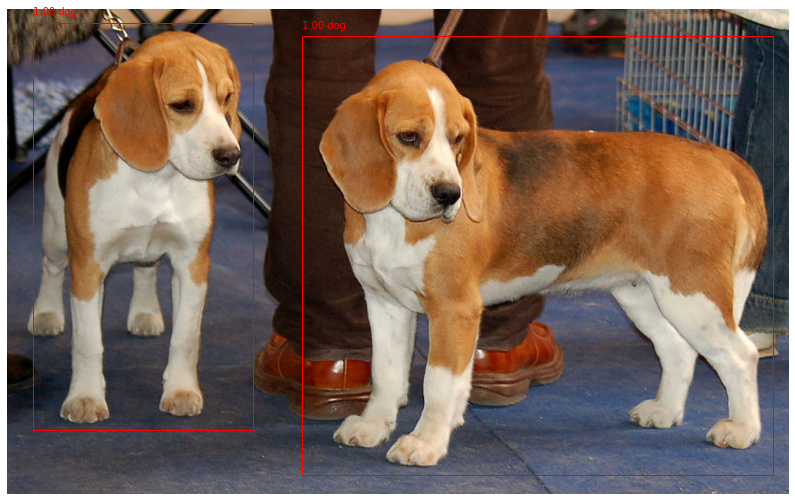

In [58]:
display_image_with_boxes(im1, output1, threshold=0.7)

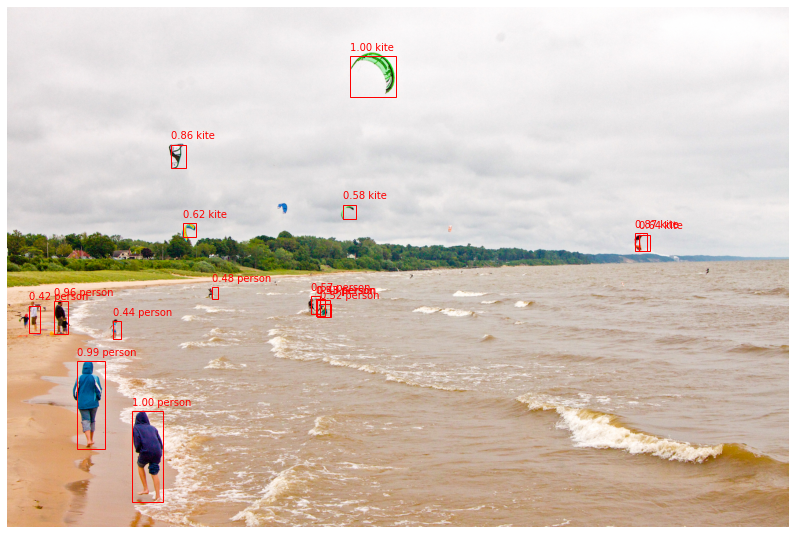

In [64]:
display_image_with_boxes(im2, output2, threshold=0.4)

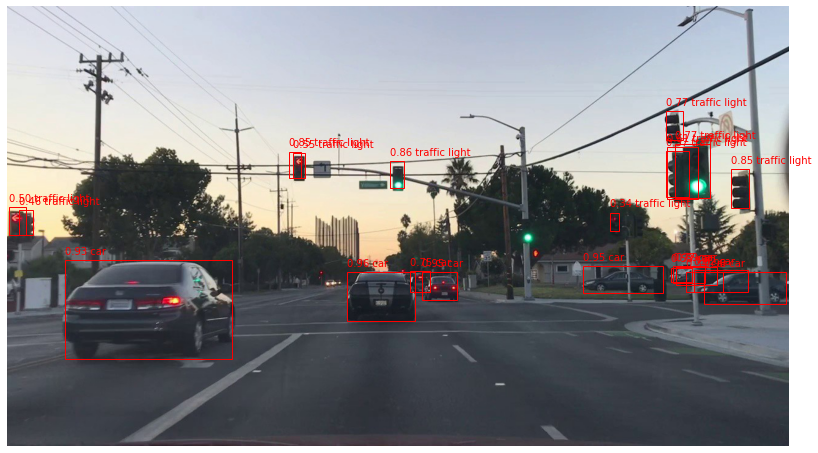

In [69]:
display_image_with_boxes(im3, output3, threshold=0.1)

In [79]:
def intersection(boxA, boxB):
  x_lst = [boxA[1], boxA[3], boxB[1], boxB[3]]
  y_lst = [boxA[0], boxA[2], boxB[0], boxB[2]]
  x_lst.remove(min(x_lst))
  x_lst.remove(max(x_lst))
  y_lst.remove(min(y_lst))
  y_lst.remove(max(y_lst))
  box = [min(y_lst), min(x_lst), max(y_lst), max(x_lst)]
  return (box[3]-box[1])*(box[2]-box[0])

In [89]:
boxA = [0.1, 0.1, 0.7, 0.7]
boxB = [0.1, 0.1, 0.7, 0.7]

In [90]:
intersection(boxA, boxB)

0.36

In [82]:
def union(boxA, boxB):
  area_boxA = (boxA[3]-boxA[1])*(boxA[2]-boxA[0])
  area_boxB = (boxB[3]-boxB[1])*(boxB[2]-boxB[0])
  return area_boxA + area_boxB - intersection(boxA, boxB)

In [84]:
def iou(boxA, boxB):
  return intersection(boxA, boxB)/union(boxA, boxB)

In [91]:
iou(boxA, boxB)

1.0

In [141]:
def apply_detection_threshold(output_dict, detection_threshold):
  new_output_dict = output_dict.copy()
  new_output_dict['detection_boxes'] = np.array([output_dict['detection_boxes'][i] for i in range(output_dict['num_detections']) if output_dict['detection_scores'][i]>=detection_threshold])
  new_output_dict['detection_classes'] = np.array([output_dict['detection_classes'][i] for i in range(output_dict['num_detections']) if output_dict['detection_scores'][i]>=detection_threshold])
  new_output_dict['detection_scores'] = np.array([output_dict['detection_scores'][i] for i in range(output_dict['num_detections']) if output_dict['detection_scores'][i]>=detection_threshold])
  return new_output_dict

In [146]:
def non_max_suppression(output_dict, iou_threshold=0, detection_threshold=0):
  new_output_dict = apply_detection_threshold(output_dict, detection_threshold)
  newer_output_dict = {}
  newer_output_dict['detection_boxes'] = new_output_dict['detection_boxes'][0]
  newer_output_dict['detection_scores'] = new_output_dict['detection_scores'][0]
  newer_output_dict['detection_classes'] = new_output_dict['detection_classes'][0]
  while True:
    lst = [new_output_dict['detection_boxes'][i] for i in range(len(new_output_dict['detection_boxes'])) if iou(new_output_dict['detection_boxes'][i], newer_output_dict['detection_boxes'][0])]
  return newer_output_dict

In [147]:
new_output1 = apply_detection_threshold(output1, 0.7)

In [148]:
newer_output1 = non_max_suppression(output1, iou_threshold=0, detection_threshold=0.7)

In [149]:
newer_output1

{'detection_boxes': array([0.05651322, 0.37624952, 0.9601691 , 0.97978187], dtype=float32)}